In [46]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

In [47]:
# Read the City Data
city_data_df = pd.read_csv(city_data)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [48]:
# Read the Ride Data
ride_data_df = pd.read_csv(ride_data)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [49]:
# Combine the data into a single dataset
combined_df = pd.merge(city_data_df, ride_data_df, on='city')
combined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [50]:
# Display the data table for preview
sorted_df = combined_df.sort_values('city')
sorted_df.head()

,city,driver_count,type,date,fare,ride_id
1523,Amandaburgh,12,Urban,2018-01-11 02:22:07,29.24,7279902884763
1522,Amandaburgh,12,Urban,2018-02-10 20:42:46,36.17,6455620849753
1529,Amandaburgh,12,Urban,2018-03-13 12:52:31,13.88,6222134922674
1524,Amandaburgh,12,Urban,2018-01-21 04:12:54,9.26,5528427024492
1525,Amandaburgh,12,Urban,2018-04-19 16:30:12,6.27,4400632718421


## Bubble Plot of Ride Sharing Data

In [51]:
# Obtain the x and y coordinates for each of the three city types
urban = sorted_df.loc[sorted_df["type"] == "Urban", :]
suburban = sorted_df.loc[sorted_df["type"] == "Suburban", :]
rural = sorted_df.loc[sorted_df["type"] == "Rural", :]

In [52]:
#Groups datasets by city
urban_by_city = urban.groupby(['city'])
suburban_by_city = suburban.groupby(['city'])
rural_by_city = rural.groupby(['city'])

In [53]:
#Ride counts
urban_ride_count = urban['city'].value_counts().sort_index()
suburban_ride_count = suburban['city'].value_counts().sort_index()
rural_ride_count = rural['city'].value_counts().sort_index()

In [54]:
#finds average fare by dividing the sum of fares by the ridecount
avg_fare_urban = urban_by_city['fare'].sum() / urban_ride_count
avg_fare_suburban = suburban_by_city['fare'].sum() / suburban_ride_count
avg_fare_rural = rural_by_city['fare'].sum() / rural_ride_count

In [55]:
#Driver count averages
urban_driver_count = urban_by_city['driver_count'].mean()
suburban_driver_count = suburban_by_city['driver_count'].mean()
rural_driver_count = rural_by_city['driver_count'].mean()

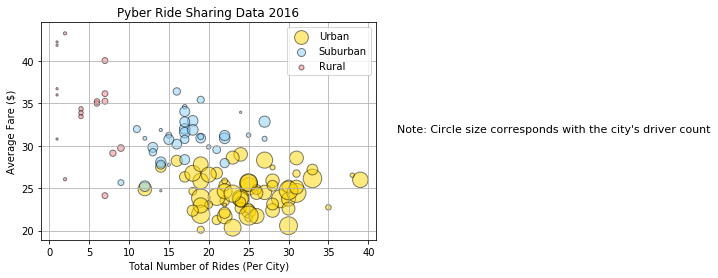

In [56]:
# Build the scatter plots for each city types
urban_legend = plt.scatter(urban_ride_count, avg_fare_urban, marker="o", facecolors="gold", edgecolors="black",
            s = urban_driver_count * 5, alpha = .5)
suburban_legend = plt.scatter(suburban_ride_count, avg_fare_suburban, marker="o", facecolors="lightskyblue", edgecolors="black",
            s = suburban_driver_count * 5, alpha = .5)
rural_legend = plt.scatter(rural_driver_count, avg_fare_rural, marker="o", facecolors="lightcoral", edgecolors="black",
            s = rural_driver_count * 5, alpha = .5)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
plt.legend((urban_legend, suburban_legend, rural_legend), ('Urban', 'Suburban', 'Rural'), loc='upper right')

# Incorporate a text label regarding circle size
plt.text(.95, 0.5, "Note: Circle size corresponds with the city's driver count", fontsize=11, transform=plt.gcf().transFigure)

# Show plot
plt.grid()
plt.show()

In [57]:
# Save Figure
plt.savefig("../Pyber/Images/Pyber_Graph.png")

<Figure size 432x288 with 0 Axes>

## Total Fares by City Type

In [58]:
# Calculate Type Percents
Total_Fares_by_City_Type = combined_df.groupby(["type"])["fare"].sum()
Total_Fares_by_City_Type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [59]:
#Create index
Total_Fares_by_City_Type.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

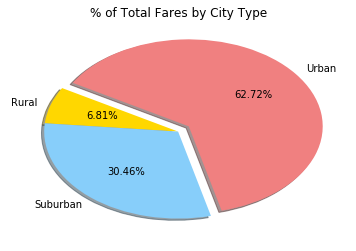

In [60]:
#Create the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)
plt.title("% of Total Fares by City Type")
plt.pie(Total_Fares_by_City_Type, labels = Total_Fares_by_City_Type.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 150)
plt.show()

In [61]:
# Save Figure
plt.savefig("../Pyber/Images/Total_Fares_Pie.png")

<Figure size 432x288 with 0 Axes>

## Total Rides by City Type

In [62]:
# Calculate Ride Percents
Total_Rides_by_City_Type = combined_df.groupby(["type"])["city"].count()
Total_Rides_by_City_Type

type
Rural        125
Suburban     625
Urban       1625
Name: city, dtype: int64

In [63]:
#Create index
Total_Rides_by_City_Type.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

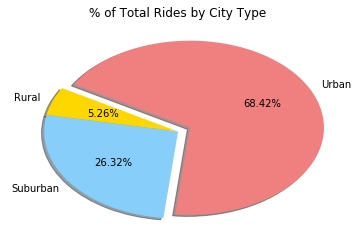

In [64]:
# Build Pie Chart
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)
plt.title("% of Total Rides by City Type")
plt.pie(Total_Rides_by_City_Type, labels = Total_Rides_by_City_Type.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 150)
plt.show()

In [65]:
# Save Figure
plt.savefig("../Pyber/Images/Total_Rides_Pie.png")

<Figure size 432x288 with 0 Axes>

## Total Drivers by City Type

In [66]:
# Calculate Driver Percents
Total_Drivers_by_City_Type = combined_df.groupby(["type"])["driver_count"].mean()
Total_Drivers_by_City_Type

type
Rural        4.296000
Suburban    13.712000
Urban       36.678154
Name: driver_count, dtype: float64

In [67]:
#Create index
Total_Drivers_by_City_Type.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

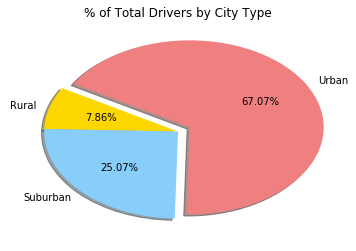

In [68]:
# Build Pie Charts
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)
plt.title("% of Total Drivers by City Type")
plt.pie(Total_Drivers_by_City_Type, labels = Total_Drivers_by_City_Type.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 150)
plt.show()

In [69]:
# Save Figure
plt.savefig("../Pyber/Images/Total_Drivers_Pie.png")

<Figure size 432x288 with 0 Axes>